# Project Name: Telco Customer Churn

Created By: Prashanth

    In this Exploratory Data Analysis we will analyse the following:
        Missing Values
        All The Numerical and Categorial Variables
        Distribution of the Numerical Variables
        Cardinality of Categorical Variables
        Outliers
        Relationship between independent and dependent feature(Churn)

In [1]:
import pandas as pd
import numpy as np

In [2]:
filepath = 'C:\\Users\\prashantha.v\\Documents\\ML_Project_2\\Telco-Customer-Churn.xlsx'
df = pd.read_excel(filepath, sheet_name=0)

In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
#To check for NaN values in the dataset
df.isnull().sum() 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
# Dropping 'customerID' column
df.drop('customerID', axis=1, inplace=True)  

In [9]:
df.shape

(7043, 20)

In [10]:
df.describe(include='all')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


Need to encode data to visualise

In [11]:
# Should convert balnk spaces(' ') into 0
# Should conver "senior Citizen" column from 0&1 to yes&no
df['TotalCharges'] = df['TotalCharges'].replace([' '], 0)
df['SeniorCitizen'] = df['SeniorCitizen'].replace([1], 'Yes').replace([0], 'No')

In [12]:
## Categorising Numerical and Categorial featurs ##
continuous_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
categorial_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('continuous features are:-', continuous_features)
print('categorial features are:-', categorial_features)

continuous features are:- ['tenure', 'MonthlyCharges', 'TotalCharges']
categorial features are:- ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [13]:
df.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1202,Male,No,Yes,No,53,Yes,No,Fiber optic,No,Yes,No,No,Yes,Yes,One year,Yes,Bank transfer (automatic),94.25,4867.95,Yes
4188,Female,Yes,No,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,103.30,2890.65,Yes
2531,Female,No,Yes,No,71,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),24.45,1681.60,No
1387,Male,No,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),24.30,1643.25,No
3824,Male,No,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Mailed check,55.30,238.50,No
666,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Electronic check,69.65,145.15,Yes
3059,Female,No,Yes,Yes,64,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.05,1559.15,No
6827,Male,No,Yes,Yes,60,Yes,No,DSL,Yes,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),79.05,4663.40,No
6282,Male,No,Yes,Yes,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.55,68.80,No
6393,Male,No,No,No,26,Yes,Yes,Fiber optic,Yes,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),92.40,2349.80,No


In [14]:
df.describe(include='all')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043.000000,7043
unique,2,2,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2
top,Male,No,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,3555,5901,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,NaN,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2279.734304,NaN
std,NaN,NaN,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2266.794470,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,398.550000,NaN
50%,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1394.550000,NaN
75%,NaN,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3786.600000,NaN


In [15]:
# Categorial feature's categories and their counts
for feature in categorial_features:
    print(df[feature].value_counts())

Male      3555
Female    3488
Name: gender, dtype: int64
No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     2810
Yes            

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

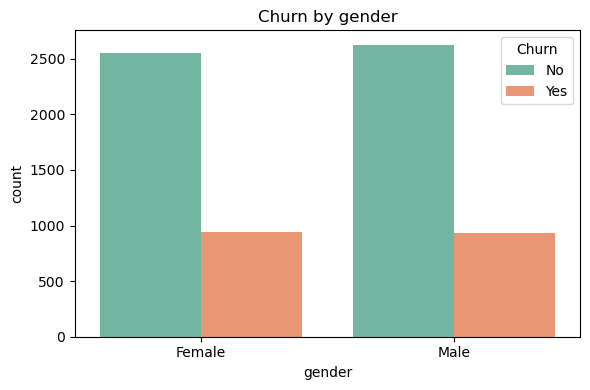

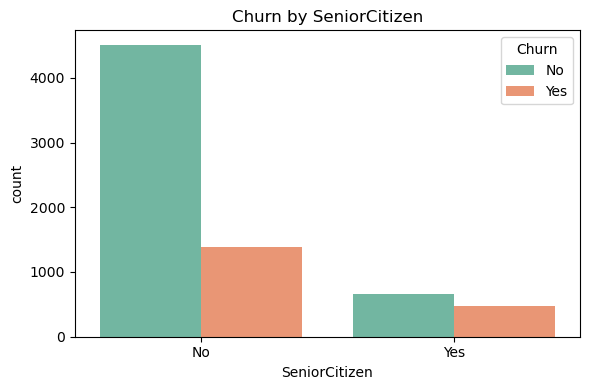

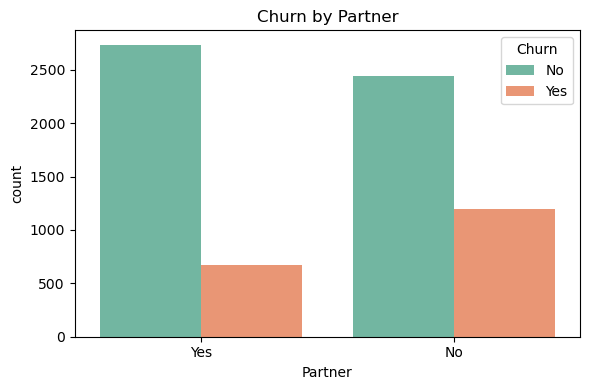

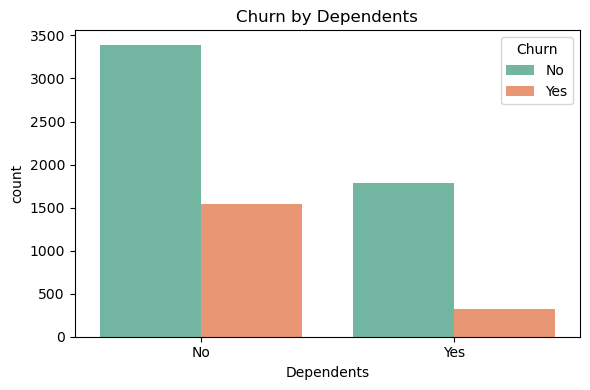

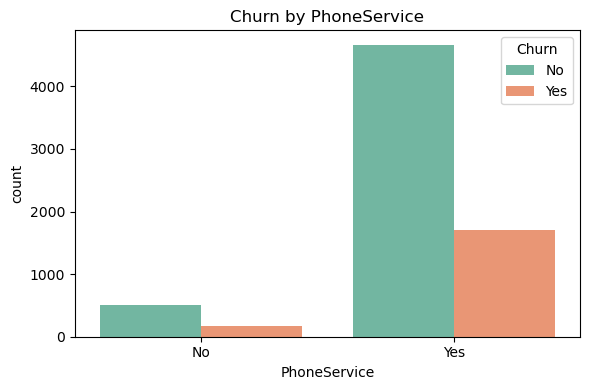

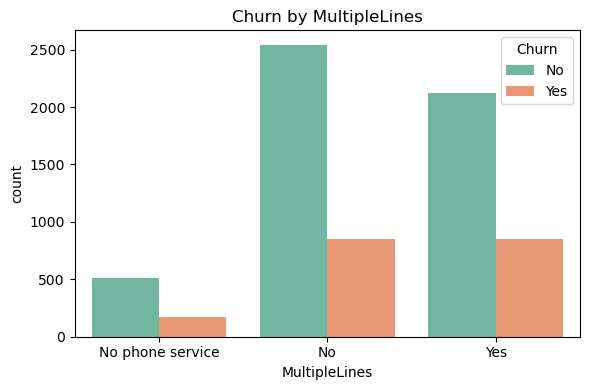

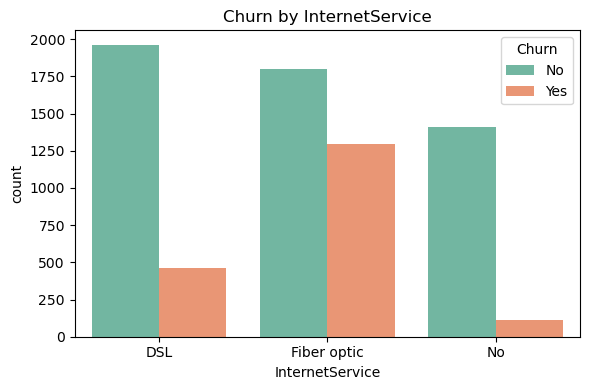

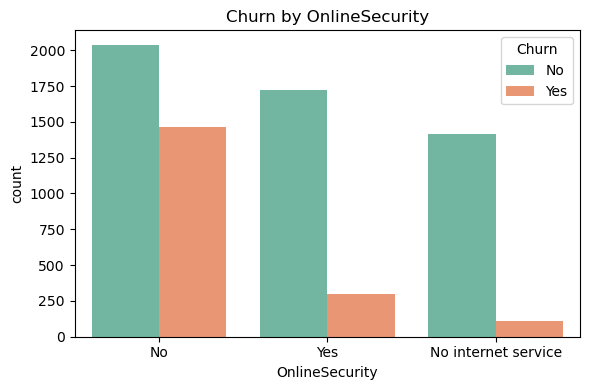

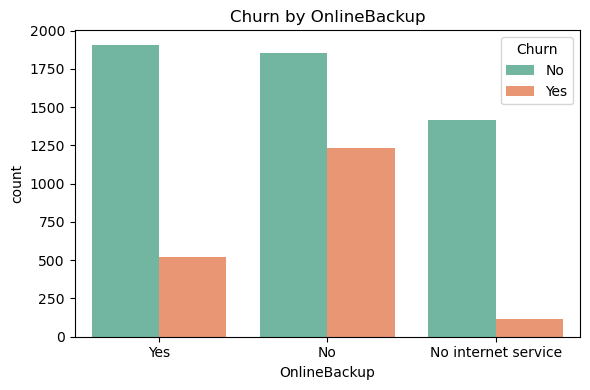

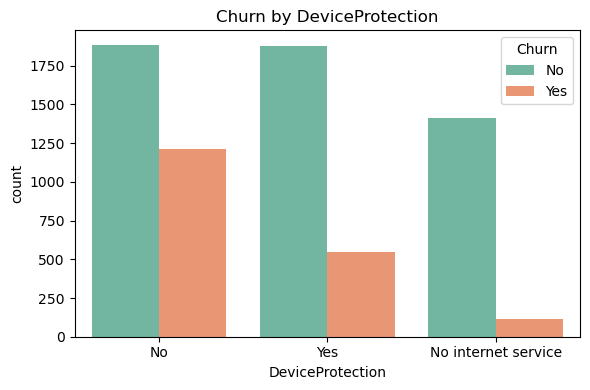

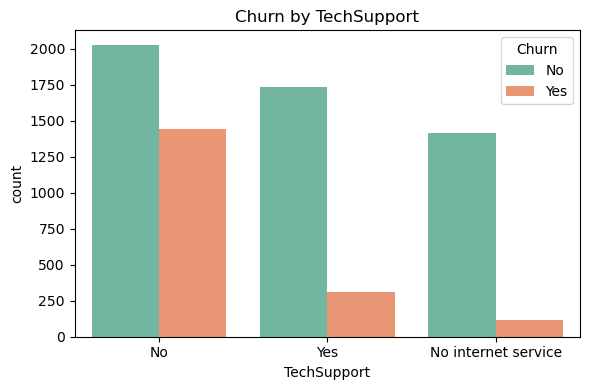

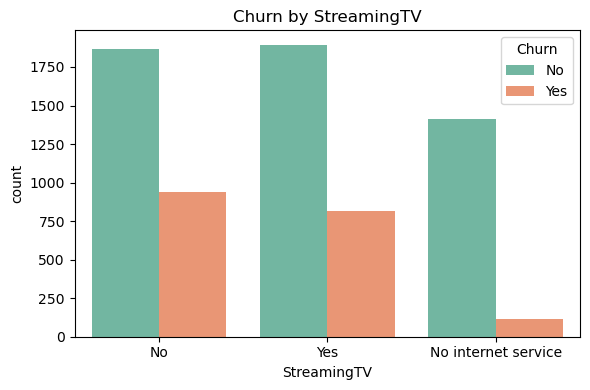

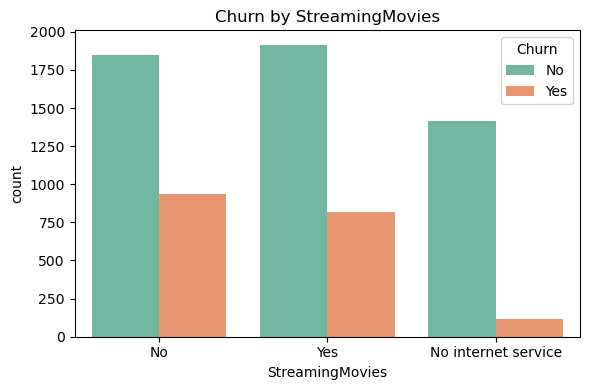

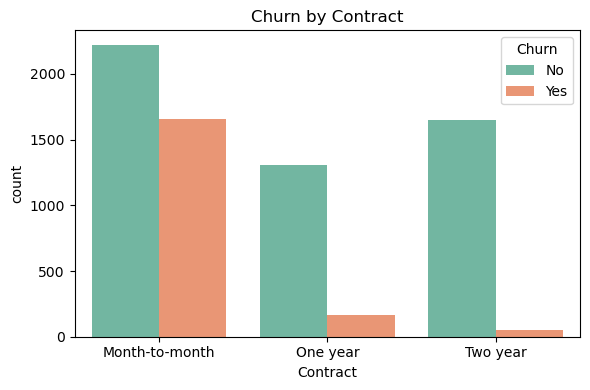

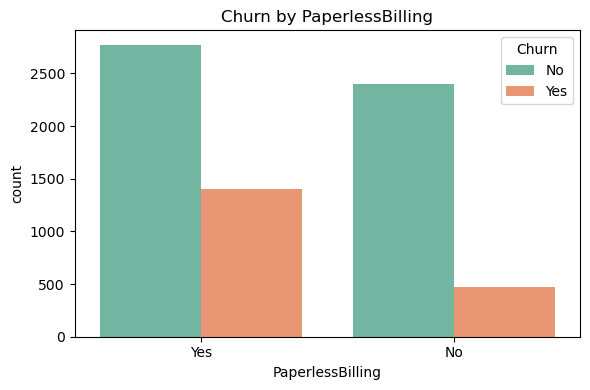

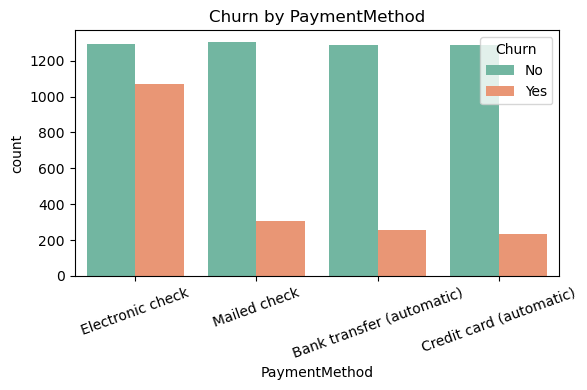

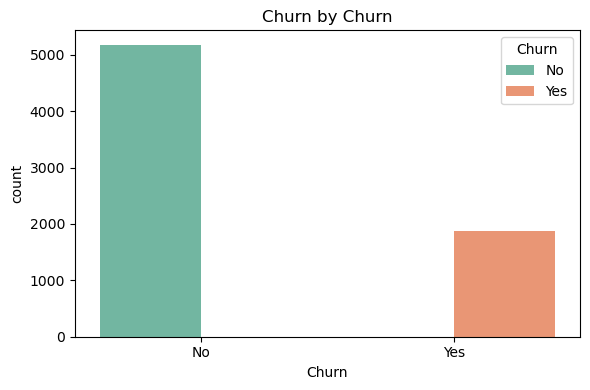

In [17]:
# Count graph
for feature in categorial_features:
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(data=df, x=feature, hue='Churn', palette='Set2')
    
    if feature == 'PaymentMethod': # Just to avoid overlapping of xticks
        ax.set_xticklabels(ax.get_xticklabels(), rotation=20)
        
    plt.title(f'Churn by {feature}')
    plt.tight_layout()
    plt.show()
              

In [18]:
# Visualizing categorial features with respect to Churn


In [19]:
#To check whether the feature is continuous or discrete
df.tenure.value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

<AxesSubplot:xlabel='tenure', ylabel='Count'>

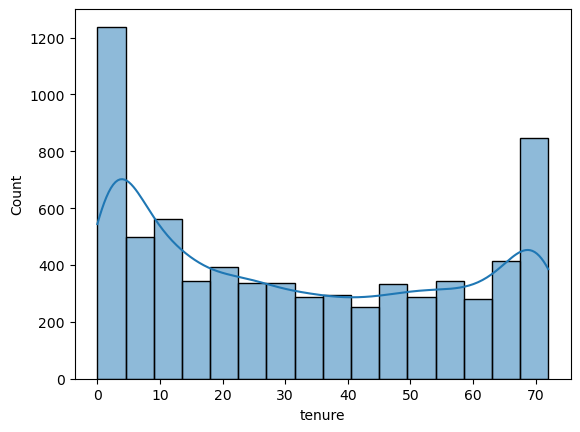

In [20]:
# Value counts for tenure column
data = df.copy()
sns.histplot(data['tenure'], kde=True)

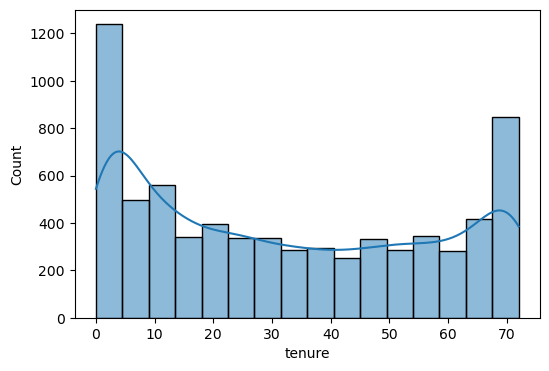

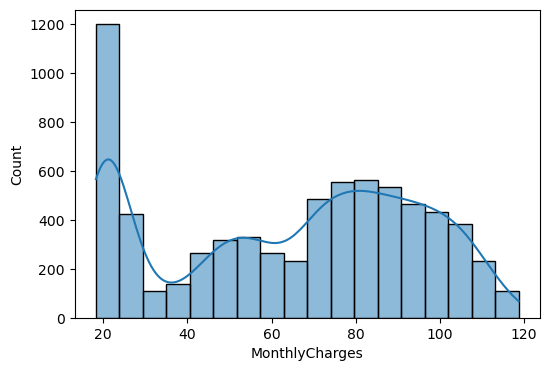

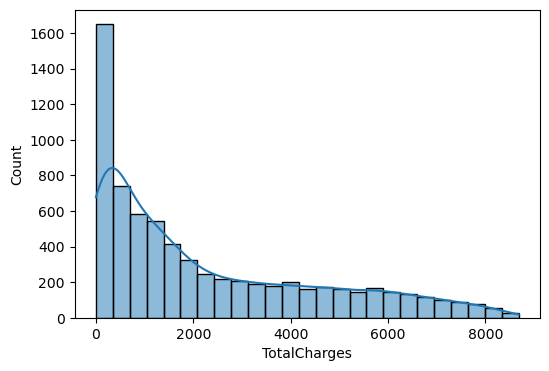

In [21]:
# Analysing continuous variabes
for feature in continuous_features:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=feature, kde=True)

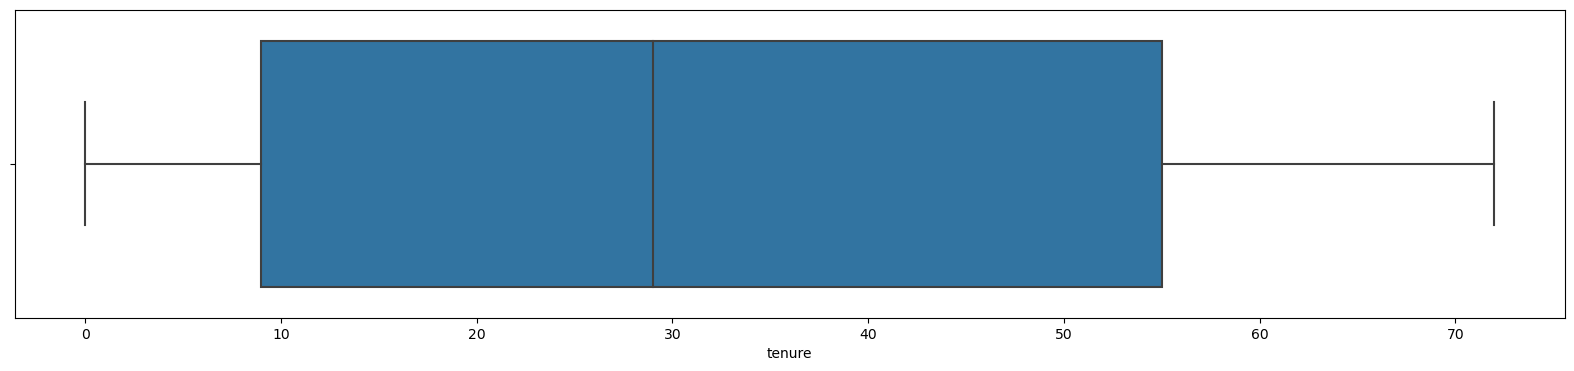

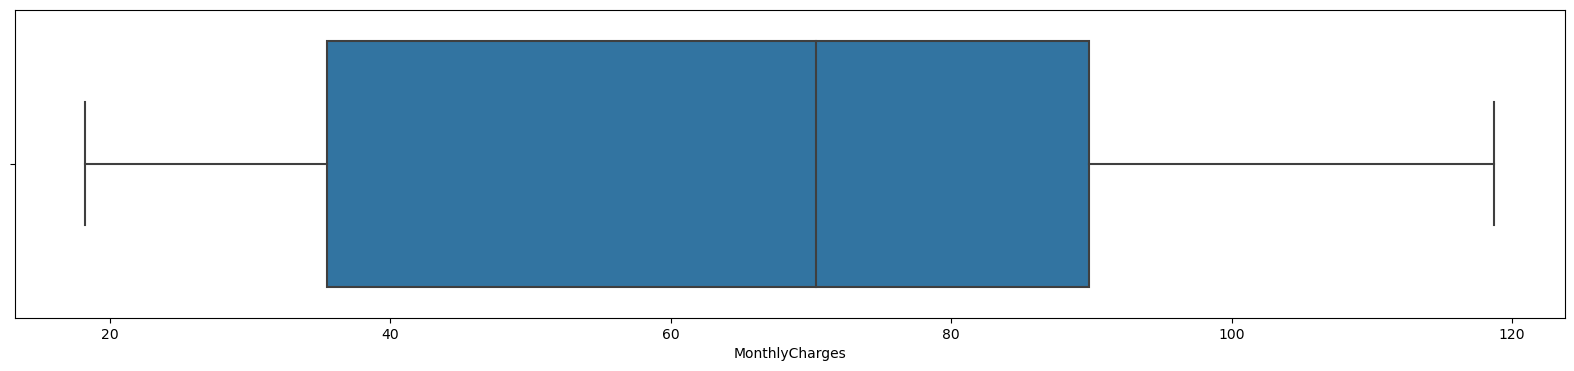

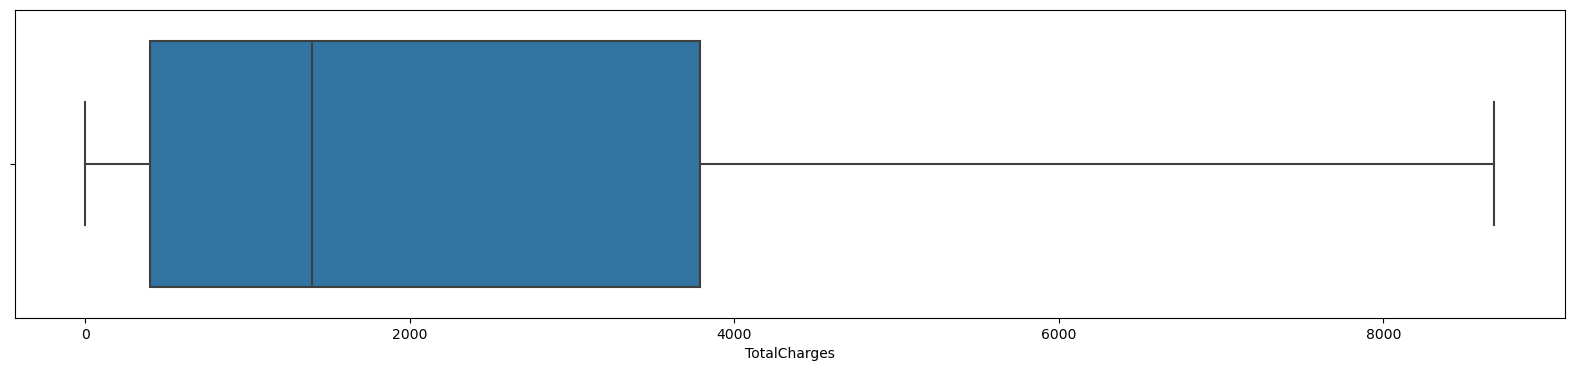

In [22]:
# We can investigate about the outliers in the continuous features using Boxplot/Violinplot
for feature in continuous_features:
    plt.figure(figsize=(20, 4))
    plt3 = sns.boxplot(data=df, x=feature)

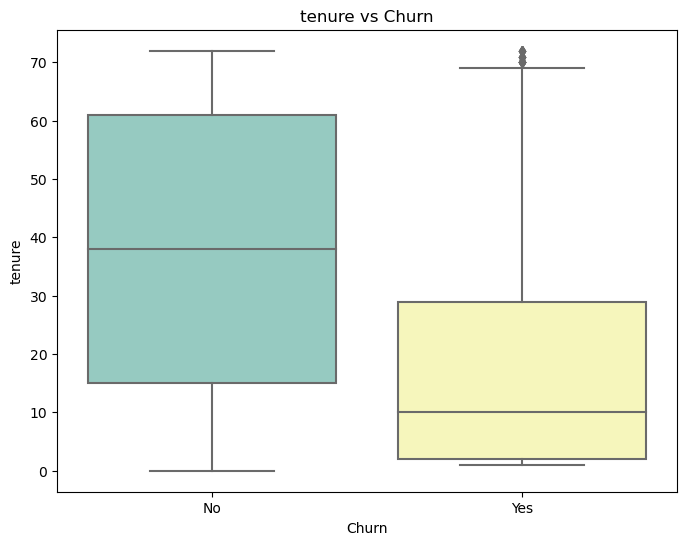

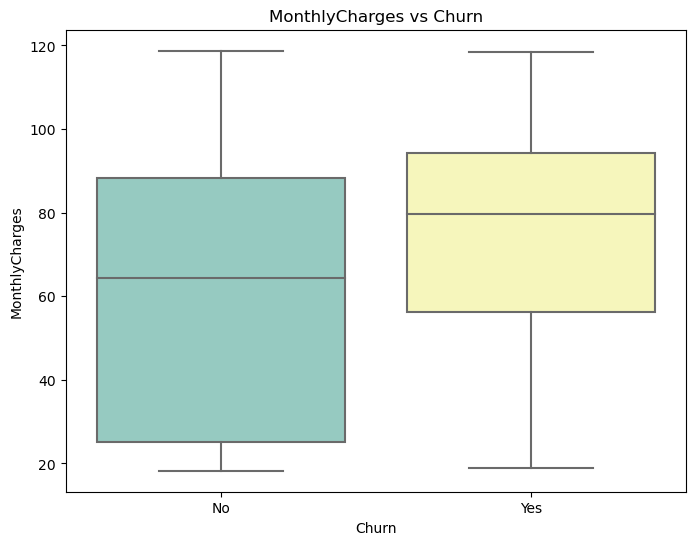

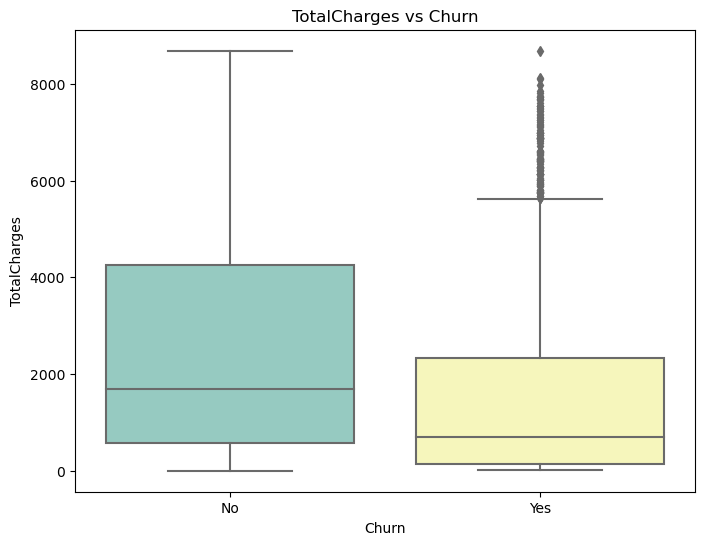

In [23]:
# Ploting Boxplot to explore relationship between Numeric feature and Churn
for feature in continuous_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Churn', y=feature, data=df, palette="Set3")
    plt.title(str(feature)+' vs Churn')

In [24]:
# If any of the columns had missing values, we can fill them by median or mode of the feature
# df['continuous_feature_name'] = df['continuous_feature_name'].fillna(df['continuous_feature_name'].median())
# df['categorial_feature_name'] = df['categorial_feature_name'].fillna(df['categorial_feature_name'].mode())

In [25]:
# We should encode the categorial data in order to plot Heatmap which is useful to find the Correlation between the features
dataset = df.copy()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for feature in categorial_features:
    dataset[feature] = le.fit_transform(dataset[feature])
    
dataset.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
675,1,1,0,0,65,1,2,1,2,0,2,2,2,2,2,1,2,110.35,7246.15,0
5176,0,0,0,1,26,0,1,0,2,0,0,2,0,2,0,0,3,45.80,1147.00,0
2189,1,0,1,1,69,1,2,2,1,1,1,1,1,1,2,0,0,24.45,1718.20,0
4259,0,0,0,0,3,1,0,2,1,1,1,1,1,1,0,1,3,19.60,59.75,1
1341,1,0,0,1,3,1,0,0,0,0,0,0,2,0,0,1,1,54.70,169.45,1
2161,0,0,0,0,2,1,0,1,0,0,2,0,0,0,0,1,2,75.80,160.75,1
1929,1,0,1,1,1,1,0,1,0,0,0,0,0,2,0,1,2,81.05,81.05,0
2500,1,0,1,1,50,1,0,0,2,0,0,2,2,2,1,0,2,75.50,4025.60,0
6332,1,0,1,1,68,1,0,1,2,2,2,0,2,2,2,1,0,105.25,7173.15,0
327,0,1,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.35,139.05,1


Model Selection

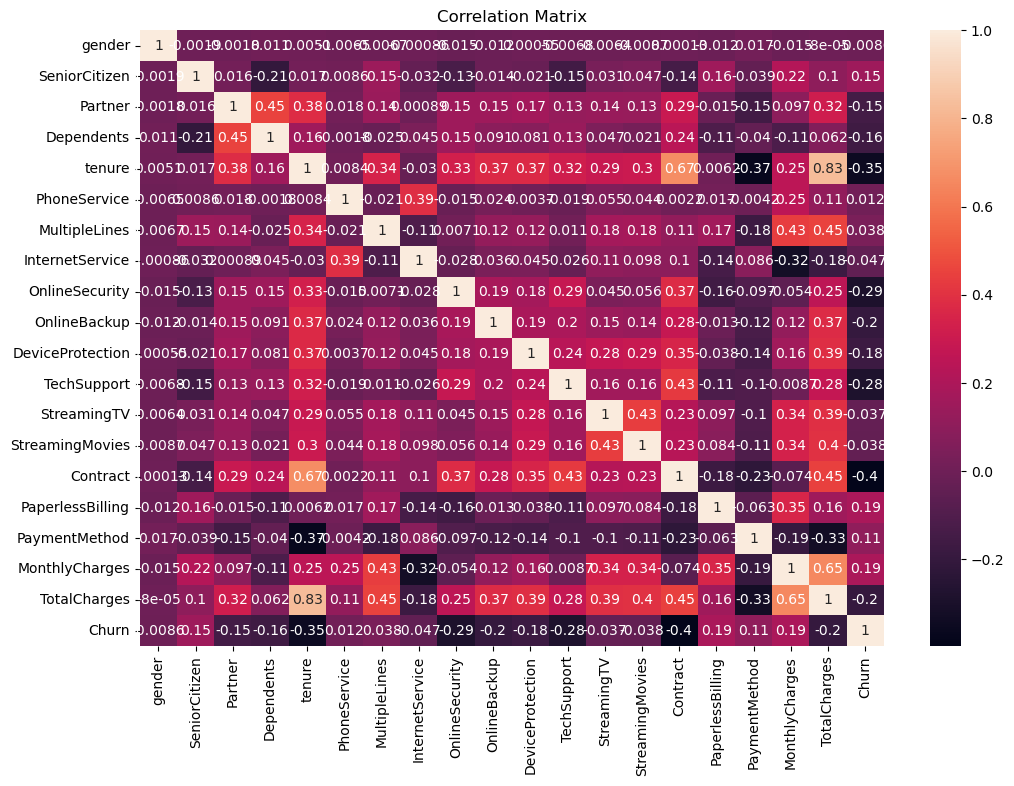

In [26]:
# Calculating correlation matric 
corr_matrix = dataset.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [27]:
X = dataset.drop(columns=['Churn'],axis=1)
y = dataset['Churn']
X.shape, y.shape

((7043, 19), (7043,))

In [28]:
# Out of 19 featutes, we can select important features by using Lasso regression model for feature selection
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

# Create a Lasso regression model
lasso_model = Lasso(alpha=0.005, random_state=0)

# Create a SelectFromModel object using the Lasso model
feature_sel_model = SelectFromModel(lasso_model)

# Fit the feature selection model on the data
feature_sel_model.fit(X, y)

# To get selected features
selected_features = feature_sel_model.get_support()

selected_columns = X.columns[selected_features]
selected_columns, selected_features

(Index(['SeniorCitizen', 'Dependents', 'tenure', 'PhoneService',
        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
        'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling',
        'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
       dtype='object'),
 array([False,  True, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True, False, False,  True,  True,  True,  True,
         True]))

In [29]:
# Dataset after droping less important features
X = X[selected_columns]
X.head()

,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,0,2,0,0,0,1,2,29.85,29.85
1,0,0,34,1,0,0,2,0,2,0,1,0,3,56.95,1889.50
2,0,0,2,1,0,0,2,2,0,0,0,1,3,53.85,108.15
3,0,0,45,0,1,0,2,0,2,2,1,0,0,42.30,1840.75
4,0,0,2,1,0,1,0,0,0,0,0,1,2,70.70,151.65


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
X_train.shape, X_test.shape

((4930, 15), (2113, 15))

In [31]:
X_train.sample(10)

,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2609,0,0,61,1,2,1,0,2,2,0,0,1,2,105.55,6281.45
4682,1,0,27,1,2,1,0,0,2,0,0,0,1,88.30,2467.75
5149,0,0,62,1,0,2,1,1,1,1,2,1,1,19.20,1123.65
283,0,0,68,1,2,0,2,0,0,0,0,0,3,54.45,3687.75
5201,0,0,9,1,0,2,1,1,1,1,1,1,2,19.90,164.60
5569,1,0,3,1,0,1,0,0,0,2,0,1,3,83.90,267.40
1459,0,0,60,1,0,1,0,2,2,0,2,1,2,99.65,5941.05
2483,1,1,46,1,2,1,2,2,2,0,0,1,2,100.70,4541.20
5883,0,0,13,1,0,2,1,1,1,1,0,1,3,20.30,275.40
3765,0,0,5,1,2,2,1,1,1,1,0,0,3,25.45,134.75


In [32]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [33]:
# Make predictions on the testing data
y_pred = tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7240889730241363


In [34]:
pred = tree.predict(X_train[100:101])
pred

array([0])

In [35]:
# predicting by ensembles - RandomForest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [36]:
rfc_pred = rfc.predict(X_test)
rfc_accu = accuracy_score(y_test, rfc_pred)
print('RFC Accuracy:', rfc_accu)

RFC Accuracy: 0.780407004259347


Here we can see that, Random Forest Classifier gives slightly better accuracy than normal Decision Tree Claasifier